# Assignment - Advanced Regression

#### by Anurag Bombarde

## Problem Statement

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


# Step 1 : EDA

In [1]:
#import numppy and pandas and Statsmodel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
houseprice_df = pd.read_csv("/Users/my/Assignment/train.csv")
houseprice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseprice_df.shape

(1460, 81)

In [4]:
missing_data =  round(houseprice_df.isnull().sum() * 100 / len(houseprice_df),2)
missing_data.loc[missing_data > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Dropping high% missing value columns

In [5]:
missing_columns = list(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

missing_columns

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [6]:
houseprice_df = houseprice_df.drop(missing_columns,axis=1)
houseprice_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
houseprice_df = houseprice_df.drop_duplicates()
houseprice_df.shape

(1460, 75)

In [8]:
# Finding the missing values
missing_data =  round(houseprice_df.isnull().sum() * 100 / len(houseprice_df),2)
missing_data.loc[missing_data > 0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

#### Dropping columns after derived values achieved.

In [9]:
houseprice_df['GarageYrBlt_Old'] = houseprice_df.GarageYrBlt.max()-houseprice_df.GarageYrBlt
houseprice_df['YearBuilt_Old'] = houseprice_df.YearBuilt.max()-houseprice_df.YearBuilt
houseprice_df['YearRemodAdd_Old'] = houseprice_df.YearRemodAdd.max()-houseprice_df.YearRemodAdd
houseprice_df['YrSold_Old'] = houseprice_df.YrSold.max()-houseprice_df.YrSold
houseprice_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
492,2006,2006,2006.0,2006,4,4,4.0,4
338,1984,1998,1984.0,2006,26,12,26.0,4
899,1961,1994,1961.0,2006,49,16,49.0,4
839,1946,1995,1946.0,2008,64,15,64.0,2
685,1984,1984,1984.0,2007,26,26,26.0,3
448,1937,1950,1937.0,2006,73,60,73.0,4
303,1972,1972,1975.0,2006,38,38,35.0,4
1243,2006,2006,2006.0,2006,4,4,4.0,4
606,1996,1996,2000.0,2009,14,14,10.0,1
47,2006,2006,2006.0,2007,4,4,4.0,3


In [10]:
houseprice_df = houseprice_df.drop(['Id','Street','Utilities','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [11]:
houseprice_df

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_Old,YearBuilt_Old,YearRemodAdd_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7.0,7,7,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34.0,34,34,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9.0,9,8,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,12.0,95,40,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10.0,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,0,0,8,WD,Normal,175000,11.0,11,10,3
1456,20,RL,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,...,0,0,2,WD,Normal,210000,32.0,32,22,0
1457,70,RL,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,...,0,2500,5,WD,Normal,266500,69.0,69,4,0
1458,20,RL,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,...,0,0,4,WD,Normal,142125,60.0,60,14,0


#### Inplace default values

In [12]:
houseprice_df.BsmtQual.fillna('NA',inplace=True)
houseprice_df.BsmtCond.fillna('NA',inplace=True)
houseprice_df.BsmtExposure.fillna('No',inplace=True)
houseprice_df.BsmtFinType1.fillna('Unf',inplace=True)
houseprice_df.BsmtFinType2.fillna('Unf',inplace=True)
houseprice_df.GarageType.fillna('Attchd',inplace=True)
houseprice_df.GarageYrBlt_Old.fillna(-1,inplace=True)
houseprice_df.GarageFinish.fillna('Unf',inplace=True)
houseprice_df.GarageQual.fillna('NA',inplace=True)
houseprice_df.GarageCond.fillna('NA',inplace=True)
houseprice_df.MasVnrType.fillna('None',inplace=True)
houseprice_df.MasVnrArea.fillna(houseprice_df.MasVnrArea.mean(),inplace=True)

In [13]:
houseprice_df

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_Old,YearBuilt_Old,YearRemodAdd_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7.0,7,7,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34.0,34,34,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9.0,9,8,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,12.0,95,40,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10.0,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,0,0,8,WD,Normal,175000,11.0,11,10,3
1456,20,RL,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,...,0,0,2,WD,Normal,210000,32.0,32,22,0
1457,70,RL,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,...,0,2500,5,WD,Normal,266500,69.0,69,4,0
1458,20,RL,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,...,0,0,4,WD,Normal,142125,60.0,60,14,0


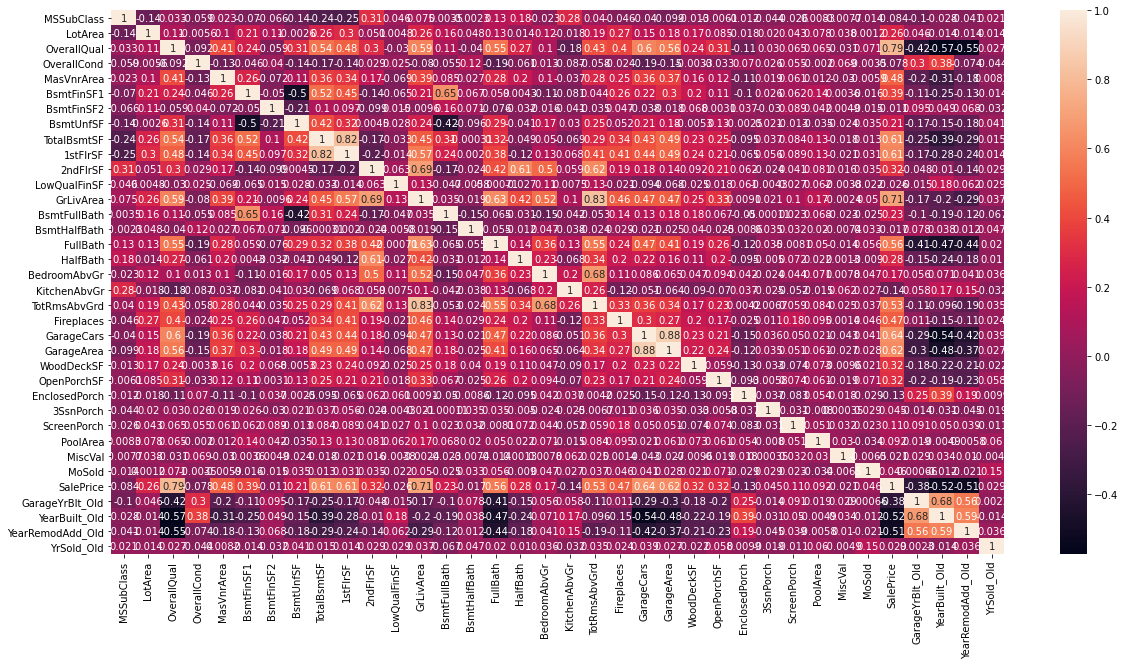

In [14]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(houseprice_df.corr(),annot=True)
plt.show()

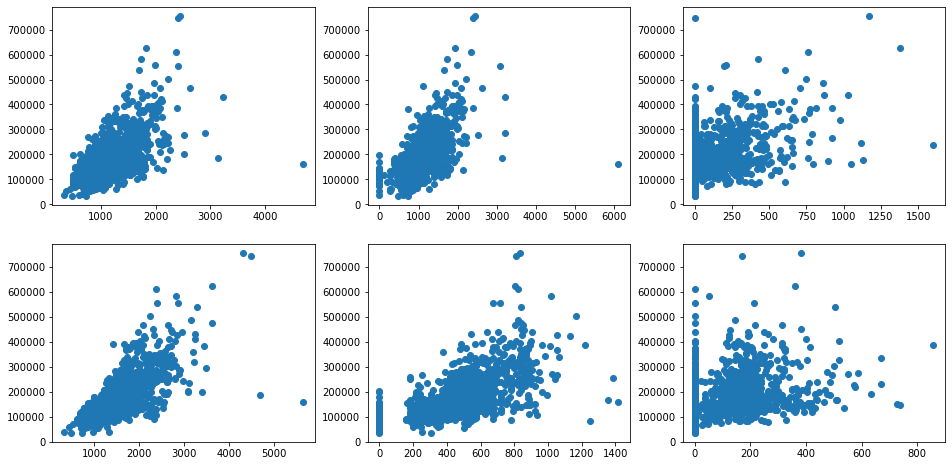

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(houseprice_df['1stFlrSF'],houseprice_df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(houseprice_df.TotalBsmtSF,houseprice_df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(houseprice_df.MasVnrArea,houseprice_df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(houseprice_df['GrLivArea'],houseprice_df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(houseprice_df['GarageArea'],houseprice_df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(houseprice_df['WoodDeckSF'],houseprice_df.SalePrice)

In [16]:
houseprice_df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_Old,YearBuilt_Old,YearRemodAdd_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7.0,7,7,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34.0,34,34,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9.0,9,8,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,12.0,95,40,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10.0,10,10,2


#### Categorical mapping

In [17]:
houseprice_df['HeatingQC'] = houseprice_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice_df['KitchenQual'] = houseprice_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice_df['LandSlope'] = houseprice_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
houseprice_df['LotShape'] = houseprice_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
houseprice_df['ExterCond'] = houseprice_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice_df['ExterQual'] = houseprice_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice_df['GarageFinish'] = houseprice_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
houseprice_df['GarageQual'] = houseprice_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice_df['GarageCond'] = houseprice_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice_df['BsmtQual'] = houseprice_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice_df['BsmtCond'] = houseprice_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice_df['BsmtExposure'] = houseprice_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
houseprice_df['BsmtFinType1'] = houseprice_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
houseprice_df['BsmtFinType2'] = houseprice_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
houseprice_df['CentralAir'] = houseprice_df.CentralAir.map({'N':0,'Y':1})

In [18]:
houseprice_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','CentralAir', 'ExterQual',
          'ExterCond','GarageFinish','GarageQual','GarageCond','HeatingQC', 'KitchenQual','LotShape','LandSlope']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,ExterQual,ExterCond,GarageFinish,GarageQual,GarageCond,HeatingQC,KitchenQual,LotShape,LandSlope
0,4,3,1,6,1,1,3,2,2,3,3,4,3,3,0
1,4,3,4,5,1,1,2,2,2,3,3,4,2,3,0
2,4,3,2,6,1,1,3,2,2,3,3,4,3,0,0
3,3,4,1,5,1,1,2,2,1,3,3,3,3,0,0
4,4,3,3,6,1,1,3,2,2,3,3,4,3,0,0


#### Dummy variable creation and unwanted column drop

In [19]:
dummy_columns = pd.get_dummies(houseprice_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

houseprice_df = pd.concat([houseprice_df,dummy_columns],axis='columns')

houseprice_df = houseprice_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [20]:
houseprice_df

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,0,8,5,350.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,3,0,6,5,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
1456,20,13175,3,0,6,6,119.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
1457,70,9042,3,0,7,9,0.0,4,3,3,...,0,0,0,0,1,0,0,0,1,0
1458,20,9717,3,0,5,6,0.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0


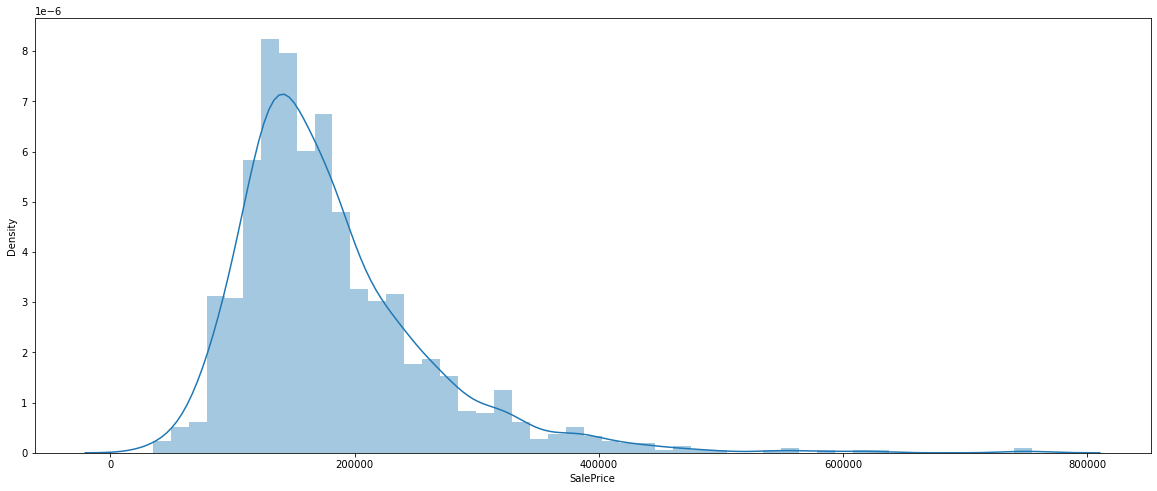

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(houseprice_df.SalePrice)
plt.show()

In [22]:
houseprice_df_train , houseprice_df_test = train_test_split(houseprice_df,train_size=0.7,random_state=100)
print(houseprice_df_train.shape)
print(houseprice_df_test.shape)

(1021, 196)
(439, 196)


In [23]:
num_col = ['BsmtFinSF2','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
'MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1',
'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'LowQualFinSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
houseprice_df_train[num_col] = scaler.fit_transform(houseprice_df_train[num_col])
houseprice_df_test[num_col] = scaler.transform(houseprice_df_test[num_col])

#### Train the Model

In [24]:
#X_train , y_train
y_train = houseprice_df_train.pop('SalePrice')
X_train = houseprice_df_train

X_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.035305,-0.057261,3,1,0.648310,-0.532073,0.807462,3,2,4,...,0,0,0,0,1,0,0,0,1,0
239,-0.195760,-0.169753,3,0,-0.066511,-1.448170,-0.560537,2,2,3,...,0,0,0,0,1,0,0,0,1,0
986,-0.195760,-0.502762,3,0,-0.066511,2.216221,-0.560537,2,3,3,...,0,0,0,0,1,0,0,0,1,0
1416,3.039142,0.082504,3,0,-1.496155,0.384025,-0.560537,2,2,3,...,0,0,0,0,1,0,0,0,1,0
390,-0.195760,-0.202365,3,0,-0.781333,2.216221,-0.560537,2,2,3,...,0,0,0,0,1,0,0,0,1,0


In [25]:
y_test = houseprice_df_test.pop('SalePrice')
X_test = houseprice_df_test

X_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888953,-0.144614,3,0,-1.496155,0.384025,-0.560537,2,2,3,...,0,0,0,0,1,0,0,0,1,0
57,0.035305,0.112107,0,0,0.648310,-0.532073,-0.560537,3,2,4,...,0,0,0,0,1,0,0,0,1,0
780,-0.888953,-0.253806,3,0,0.648310,-0.532073,-0.357475,2,2,4,...,0,0,0,0,1,0,0,0,1,0
382,0.035305,-0.120835,0,0,0.648310,-0.532073,-0.560537,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1170,0.497433,-0.059203,3,0,-0.066511,0.384025,-0.560537,2,2,3,...,0,0,0,0,1,0,0,0,1,0


In [26]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,195)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=195)

In [27]:
rfe_score = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_score.columns = ['Column_Names','Status','Rank']

In [28]:
rfe_sel_columns = list(rfe_score[rfe_score.Status==True].Column_Names)
print(rfe_sel_columns)

['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'GarageYrBlt_Old', 'YearBuilt_Old', 'YearRemodAdd_Old', 'YrSold_Old', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'N

In [29]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [30]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9342574186511475
0.8135735918338779
67.1231755571784
84.27835593517702
0.0657425813488525
0.19197803174300004


#### First try with lasso regression

In [31]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8918466986323872
0.8545515379293916


#### As we can see the above alpha value is not optimal for lasso there are sign of overfitting the clear difference we can see in the train and test score
#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [32]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

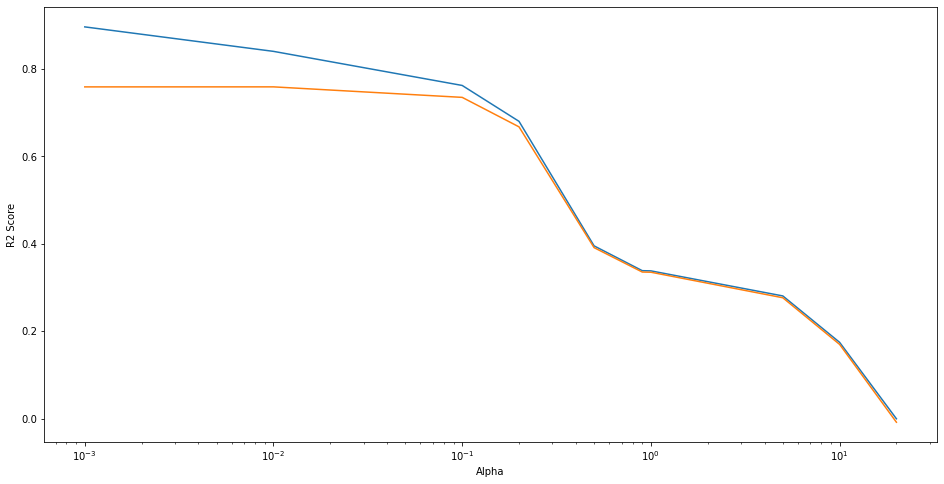

In [33]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [34]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [35]:

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

y_pred_train = lasso.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8372319420231107
0.8368795587133783


In [36]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = houseprice_df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [37]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.346320
5,OverallCond,0.242032
77,Neighborhood_OldTown,0.209550
76,Neighborhood_NridgHt,0.205890
31,TotRmsAbvGrd,0.103046
35,GarageArea,0.096361
12,BsmtFinType1,0.088192
8,ExterCond,0.081628
87,Condition1_PosA,0.080344
7,ExterQual,0.055252


## Now, we will go for Ridge regression

In [38]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    9.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

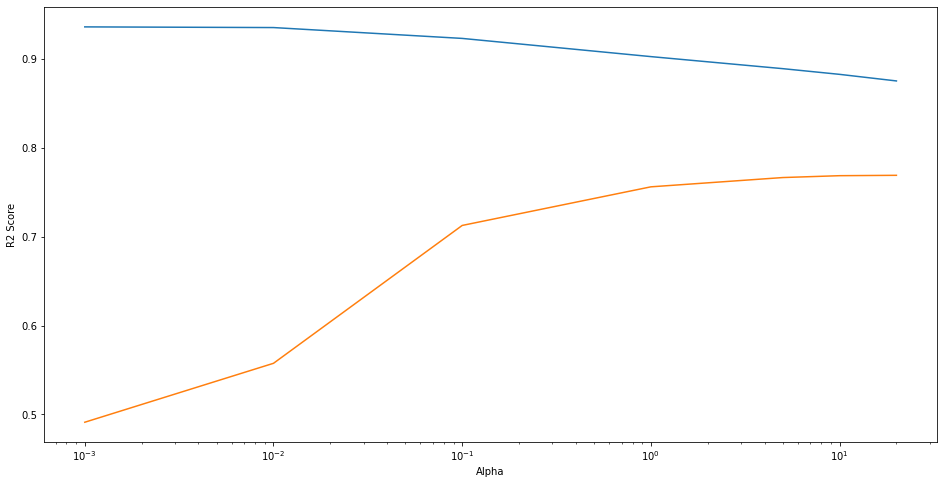

In [39]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [40]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [41]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9342468536658213
0.814596382108107


In [42]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = houseprice_df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']


In [43]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
123,Exterior1st_AsphShn,9.744117
118,RoofMatl_Metal,9.654680
119,RoofMatl_Roll,8.972255
121,RoofMatl_WdShake,8.893163
117,RoofMatl_Membran,8.748567
120,RoofMatl_Tar&Grv,8.704376
122,RoofMatl_WdShngl,8.202943
116,RoofMatl_CompShg,0.645582
142,Exterior2nd_HdBoard,0.612104
144,Exterior2nd_MetalSd,0.482410


#### Lasso regression is final model, as it penalize more on the dataset and does feature elimination.

### Final Model selection : Lasso regression

### Best alpha value for Lasso : {'alpha': 0.01}

### Best alpha value for Ridge : {'alpha': 20.0}

### Features explaining the DataSet

BsmtFullBath	        0.346320
OverallCond	            0.242032
Neighborhood_OldTown	0.209550
Neighborhood_NridgHt	0.205890
TotRmsAbvGrd	        0.103046

In [44]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8812564101198541
0.8591211119605175


In [45]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = houseprice_df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
123,Exterior1st_AsphShn,0.752243
76,Neighborhood_NridgHt,0.489745
77,Neighborhood_OldTown,0.461670
24,BsmtFullBath,0.330302
67,Neighborhood_Edwards,0.232571
82,Neighborhood_StoneBr,0.214385
5,OverallCond,0.194078
83,Neighborhood_Timber,0.169771
126,Exterior1st_CBlock,0.161211
188,SaleType_Oth,0.133971


In [46]:
ridge = Ridge(alpha = 40.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8640761878601945
0.8593581699411202


In [47]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = houseprice_df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,OverallCond,0.200755
76,Neighborhood_NridgHt,0.199647
77,Neighborhood_OldTown,0.197090
24,BsmtFullBath,0.182501
22,LowQualFinSF,0.143748
87,Condition1_PosA,0.108640
123,Exterior1st_AsphShn,0.102766
67,Neighborhood_Edwards,0.102075
31,TotRmsAbvGrd,0.102039
106,HouseStyle_2.5Fin,0.097812
